In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('ECG_Cardiac_Features.csv')

# Check the shape of the data and first few rows
print(df.shape)
print(df.head())

# Check for missing values and data types
print(df.info())
print(df.isnull().sum())

# Summary statistics
print(df.describe())



(20794, 21)
   ecg_id  Patient_ID Label  Heart Rate   HRV_MeanNN   HRV_SDNN  HRV_RMSSD  \
0       1     15709.0  NORM   63.847119   940.000000  17.320508  22.627417   
1       2     13243.0  NORM   47.838174  1258.285714  82.836615  54.546616   
2       3     20372.0  NORM   63.822587   940.444444  20.019435  17.606817   
3       4     17014.0  NORM   75.152692   800.545455  45.511237  35.185224   
4       5     17448.0  NORM   66.456900   905.200000  51.018080  57.271284   

   HRV_pNN50  QRS_duration  PR_duration  ...  RR Interval SD  \
0   0.000000    141.714286   127.333333  ...       16.329932   
1  42.857143    174.285714   152.000000  ...       76.691803   
2   0.000000    130.750000   114.500000  ...       18.874504   
3   9.090909    160.727273   110.000000  ...       43.393262   
4  50.000000           NaN   122.000000  ...       48.400000   

   RR Interval RMSSD  RR Interval Min  RR Interval Max  QT Interval Mean  \
0          22.627417            914.0            964.0    

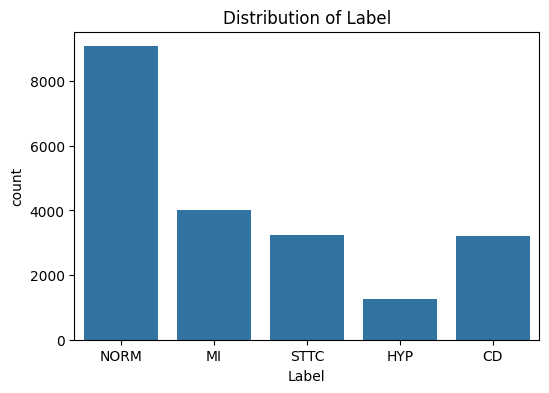

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of 'Label'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Label')
plt.title('Distribution of Label')
plt.show()


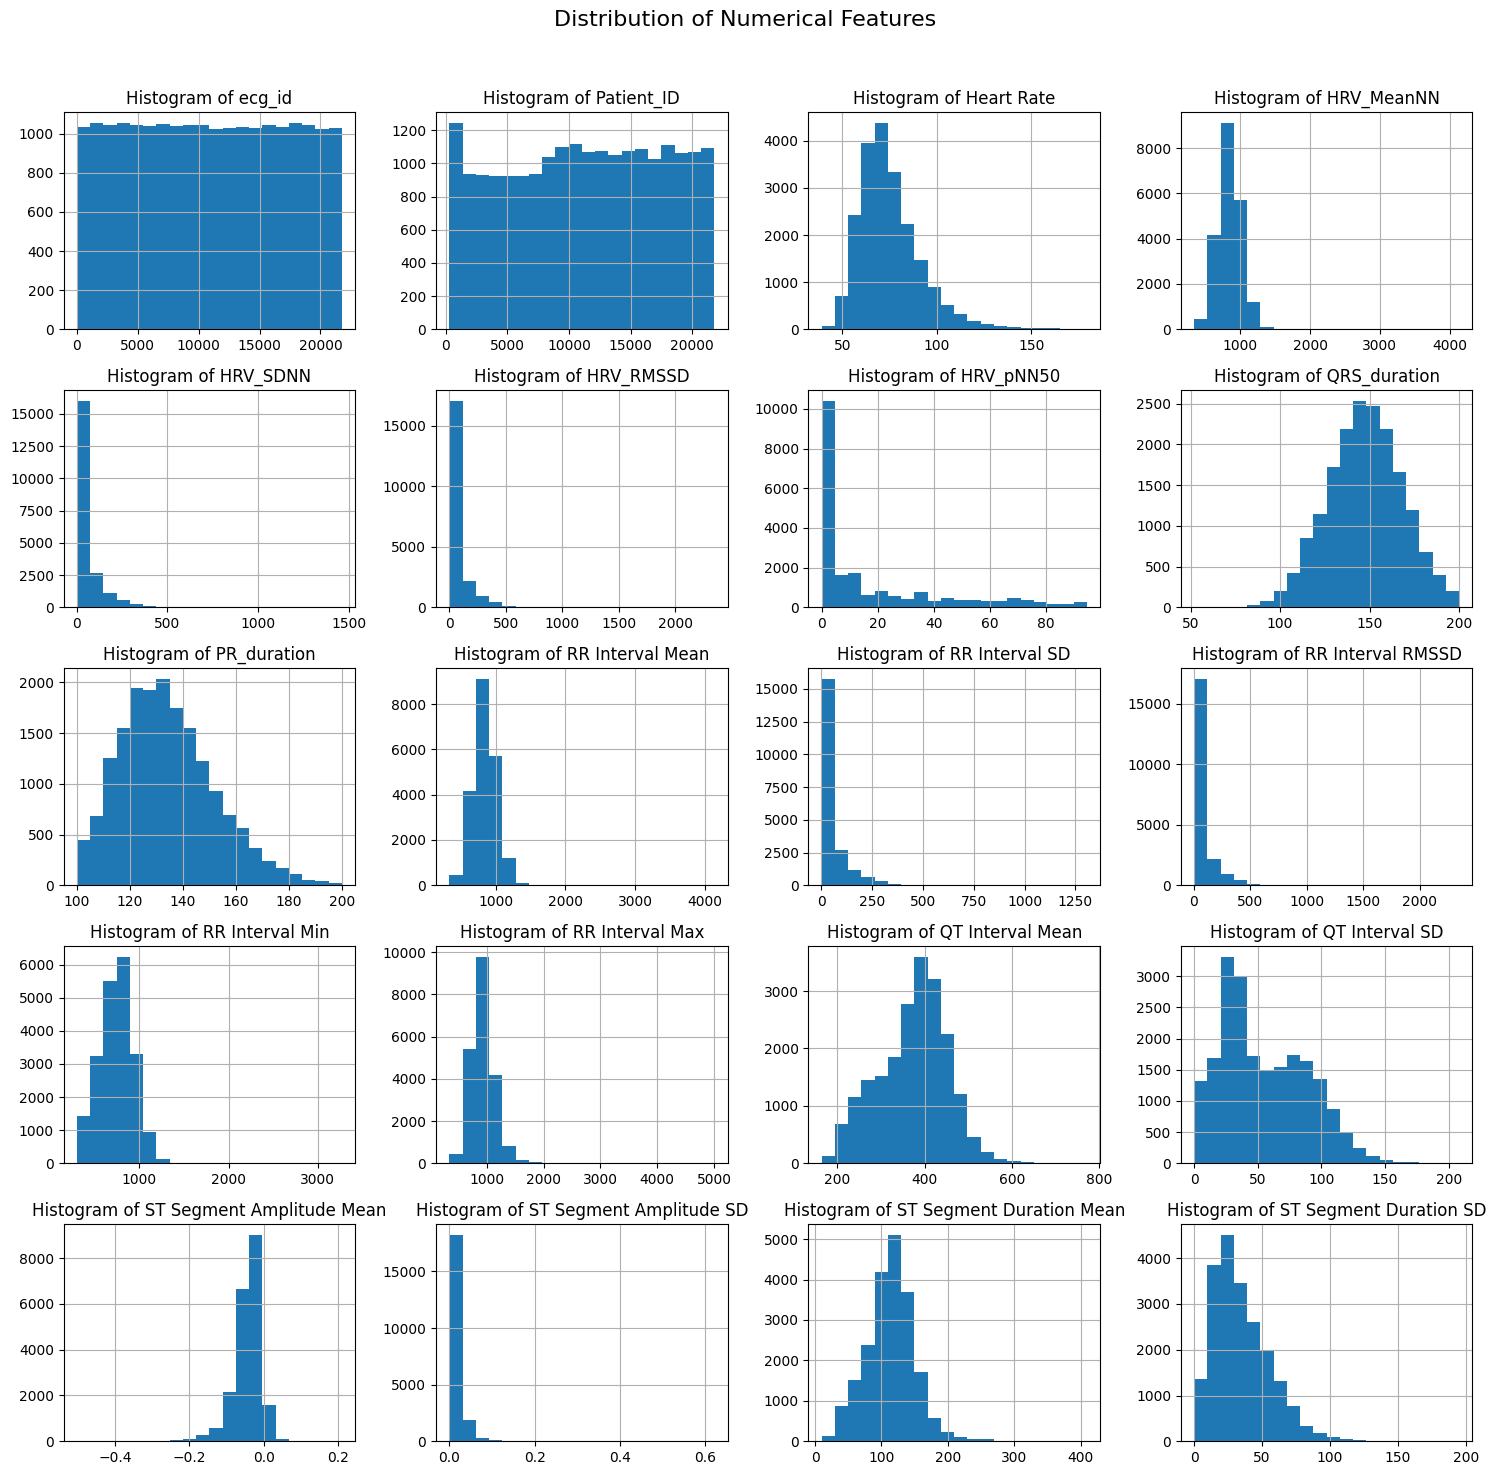

In [9]:
import matplotlib.pyplot as plt
import numpy as np

numeric_columns = df.select_dtypes(include=['number']).columns

num_plots = len(numeric_columns)

ncols = 4 
nrows = np.ceil(num_plots / ncols).astype(int)  
plt.figure(figsize=(15, nrows * 3)) 

# Plot histograms for each numeric column
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(nrows, ncols, i)  
    df[col].hist(bins=20)
    plt.title(f'Histogram of {col}')


plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()


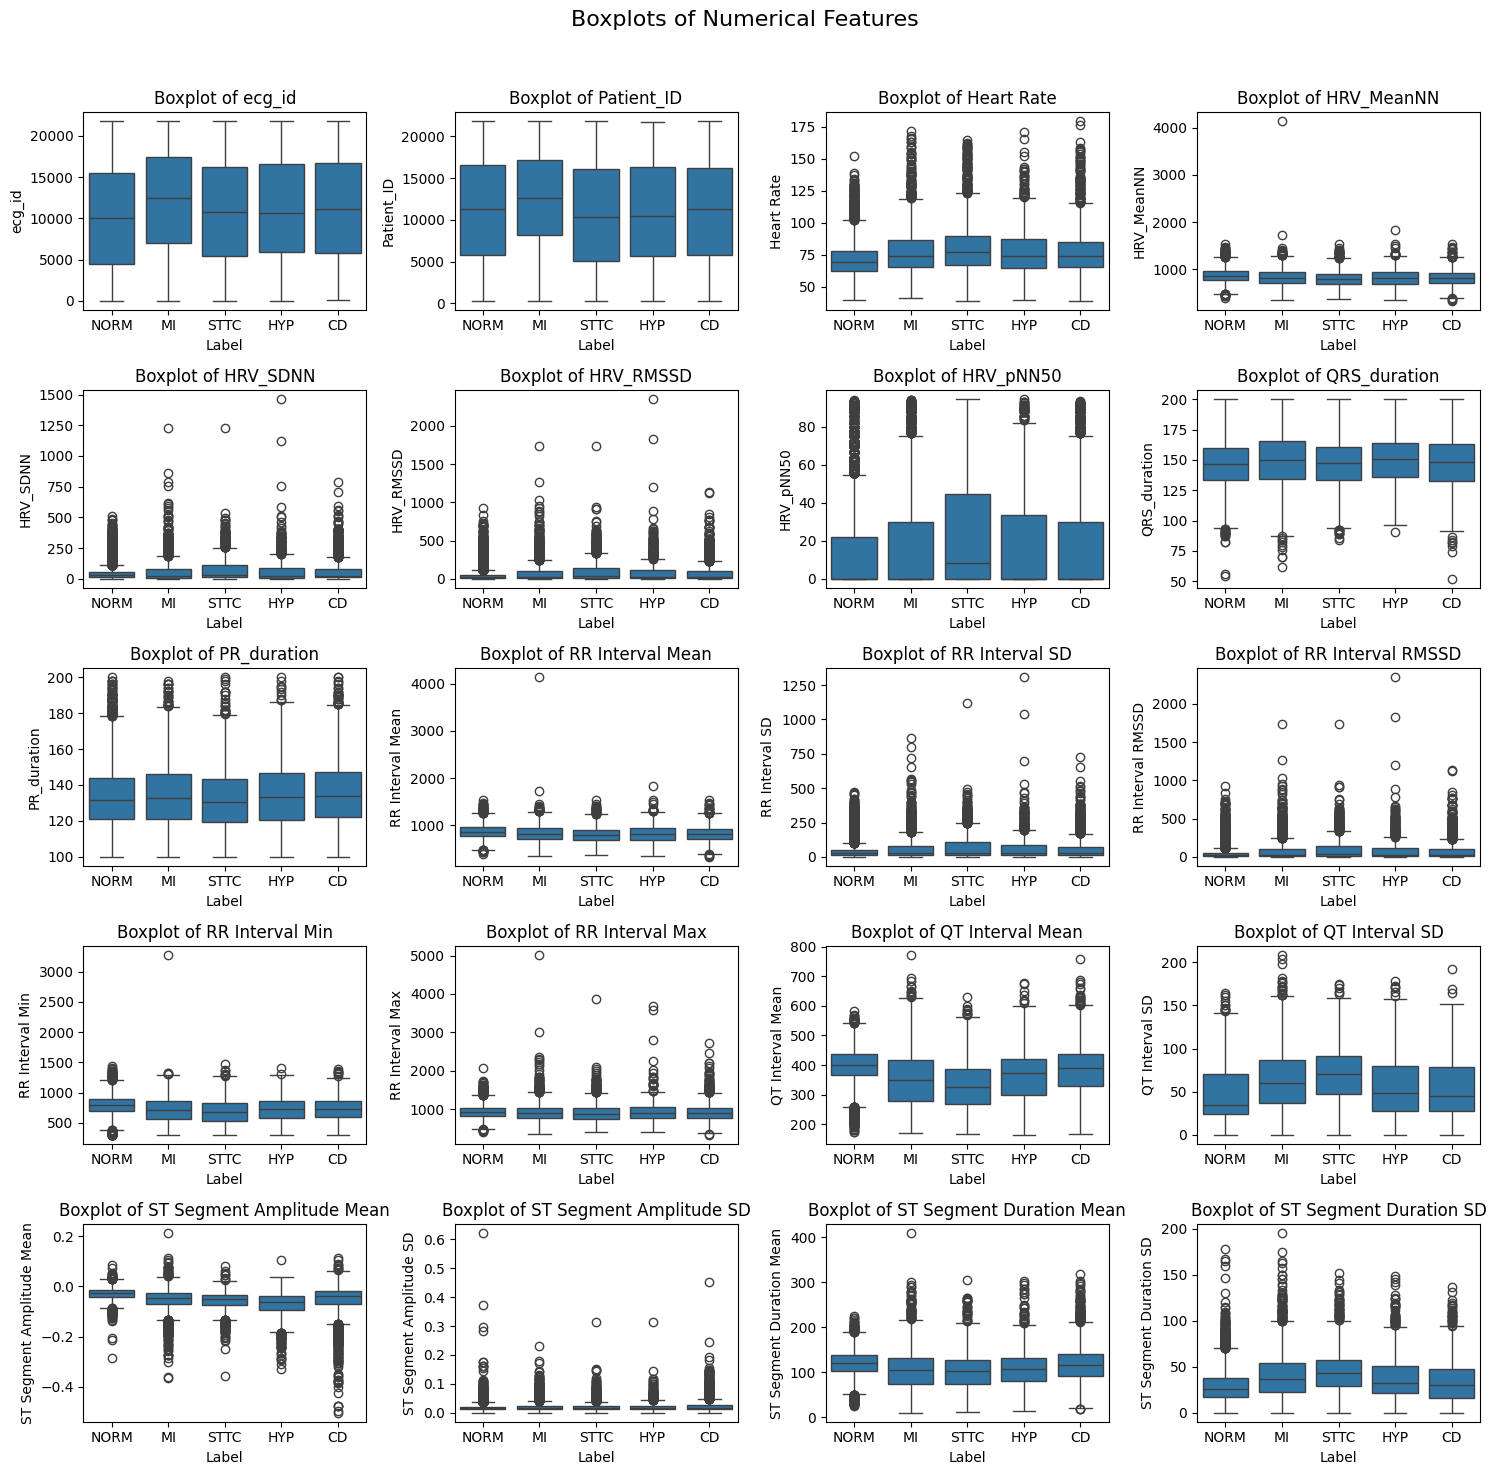

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeric_columns = df.select_dtypes(include=['number']).columns

num_plots = len(numeric_columns)


ncols = 4  
nrows = np.ceil(num_plots / ncols).astype(int) 

plt.figure(figsize=(15, nrows * 3))  

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(nrows, ncols, i) 
    sns.boxplot(x='Label', y=col, data=df)
    plt.title(f'Boxplot of {col}')

plt.suptitle('Boxplots of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()


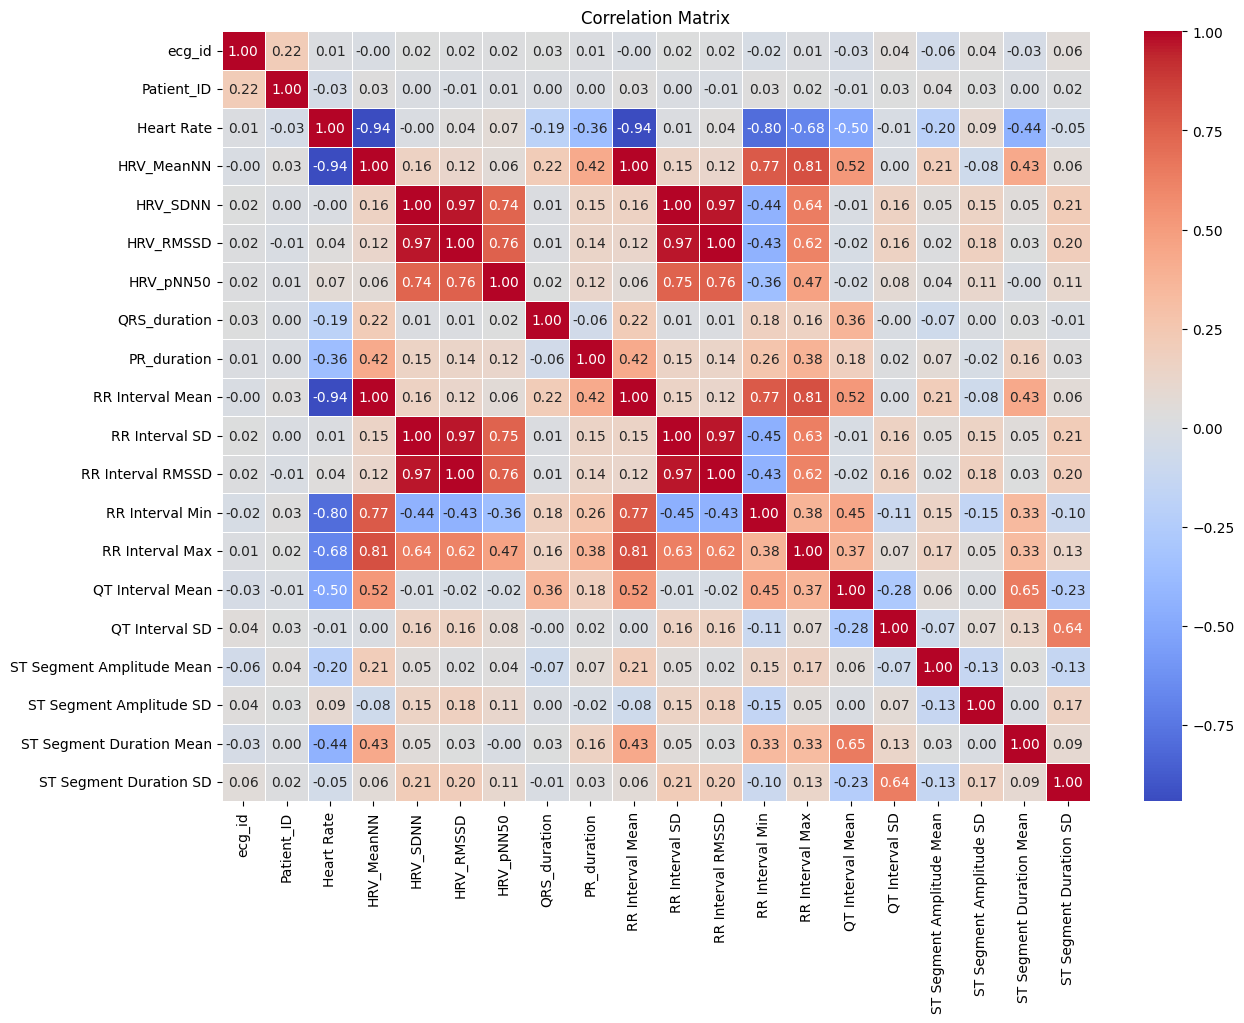

In [12]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


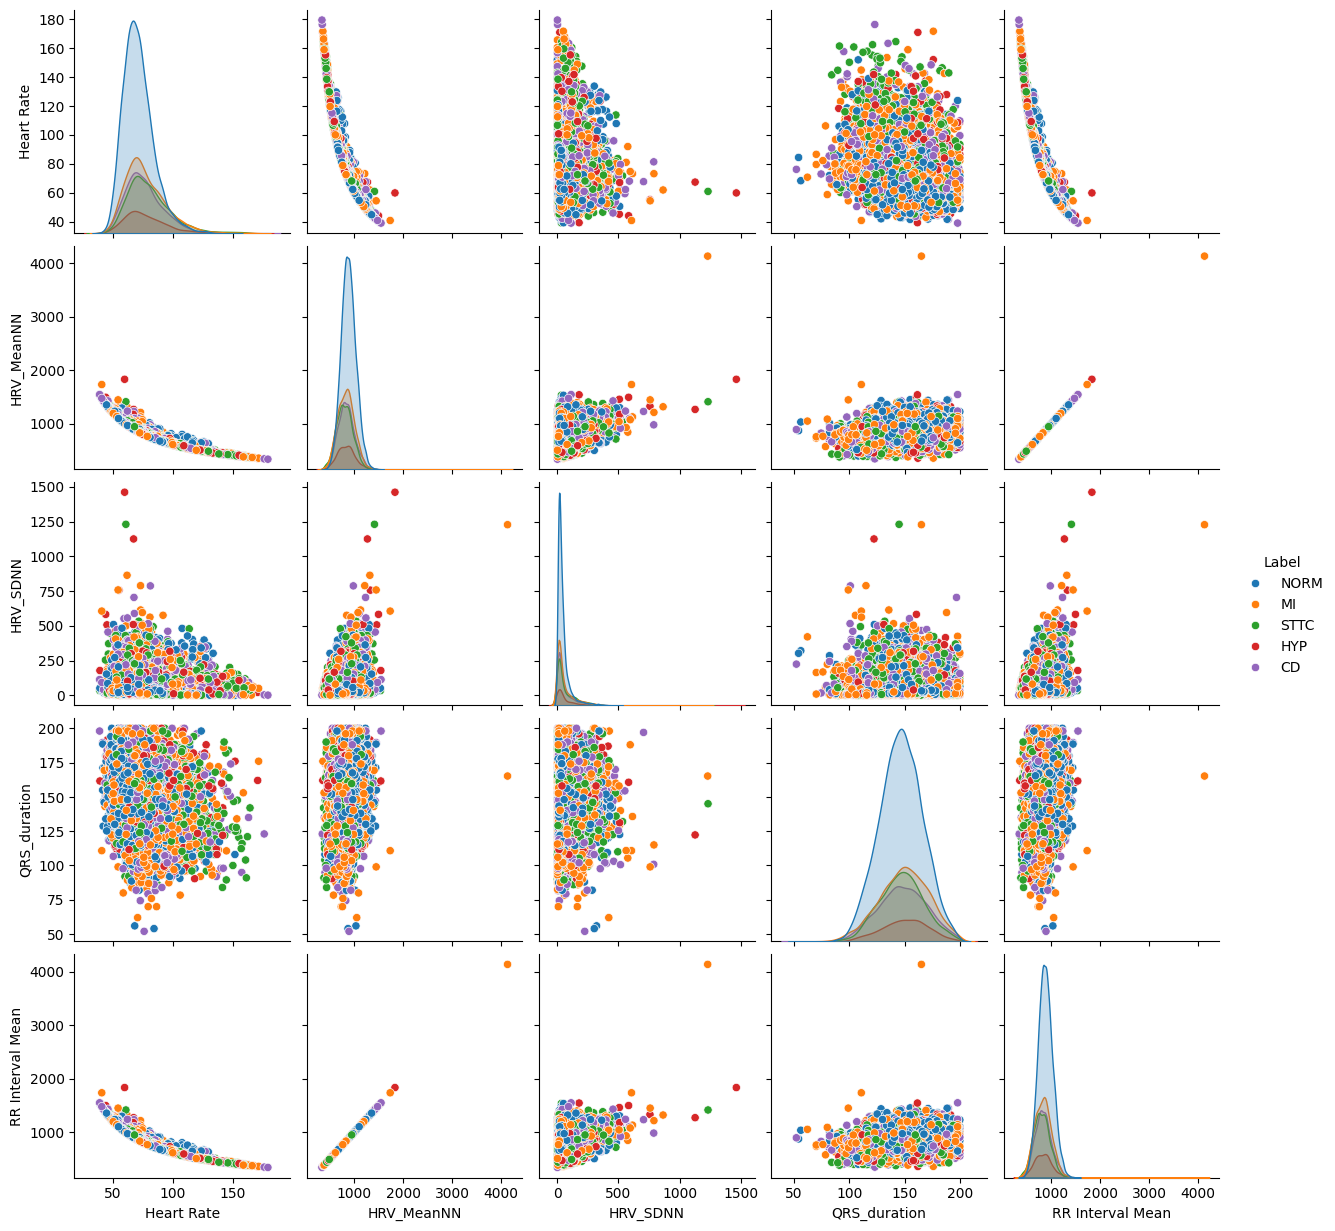

In [13]:
# Pairplot for selected numeric features
sns.pairplot(df, vars=['Heart Rate', 'HRV_MeanNN', 'HRV_SDNN', 'QRS_duration', 'RR Interval Mean'], hue='Label')
plt.show()


C:\Users\Rishi\AppData\Local\Temp\ipykernel_17616\1595570402.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Label', y=col, data=df, palette='muted')
C:\Users\Rishi\AppData\Local\Temp\ipykernel_17616\1595570402.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Label', y=col, data=df, palette='muted')
C:\Users\Rishi\AppData\Local\Temp\ipykernel_17616\1595570402.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Label', y=col, data=df, palette='muted')
C:\Users\Rishi\AppData\Local\Temp\ipykernel_17616\1595570402.py:

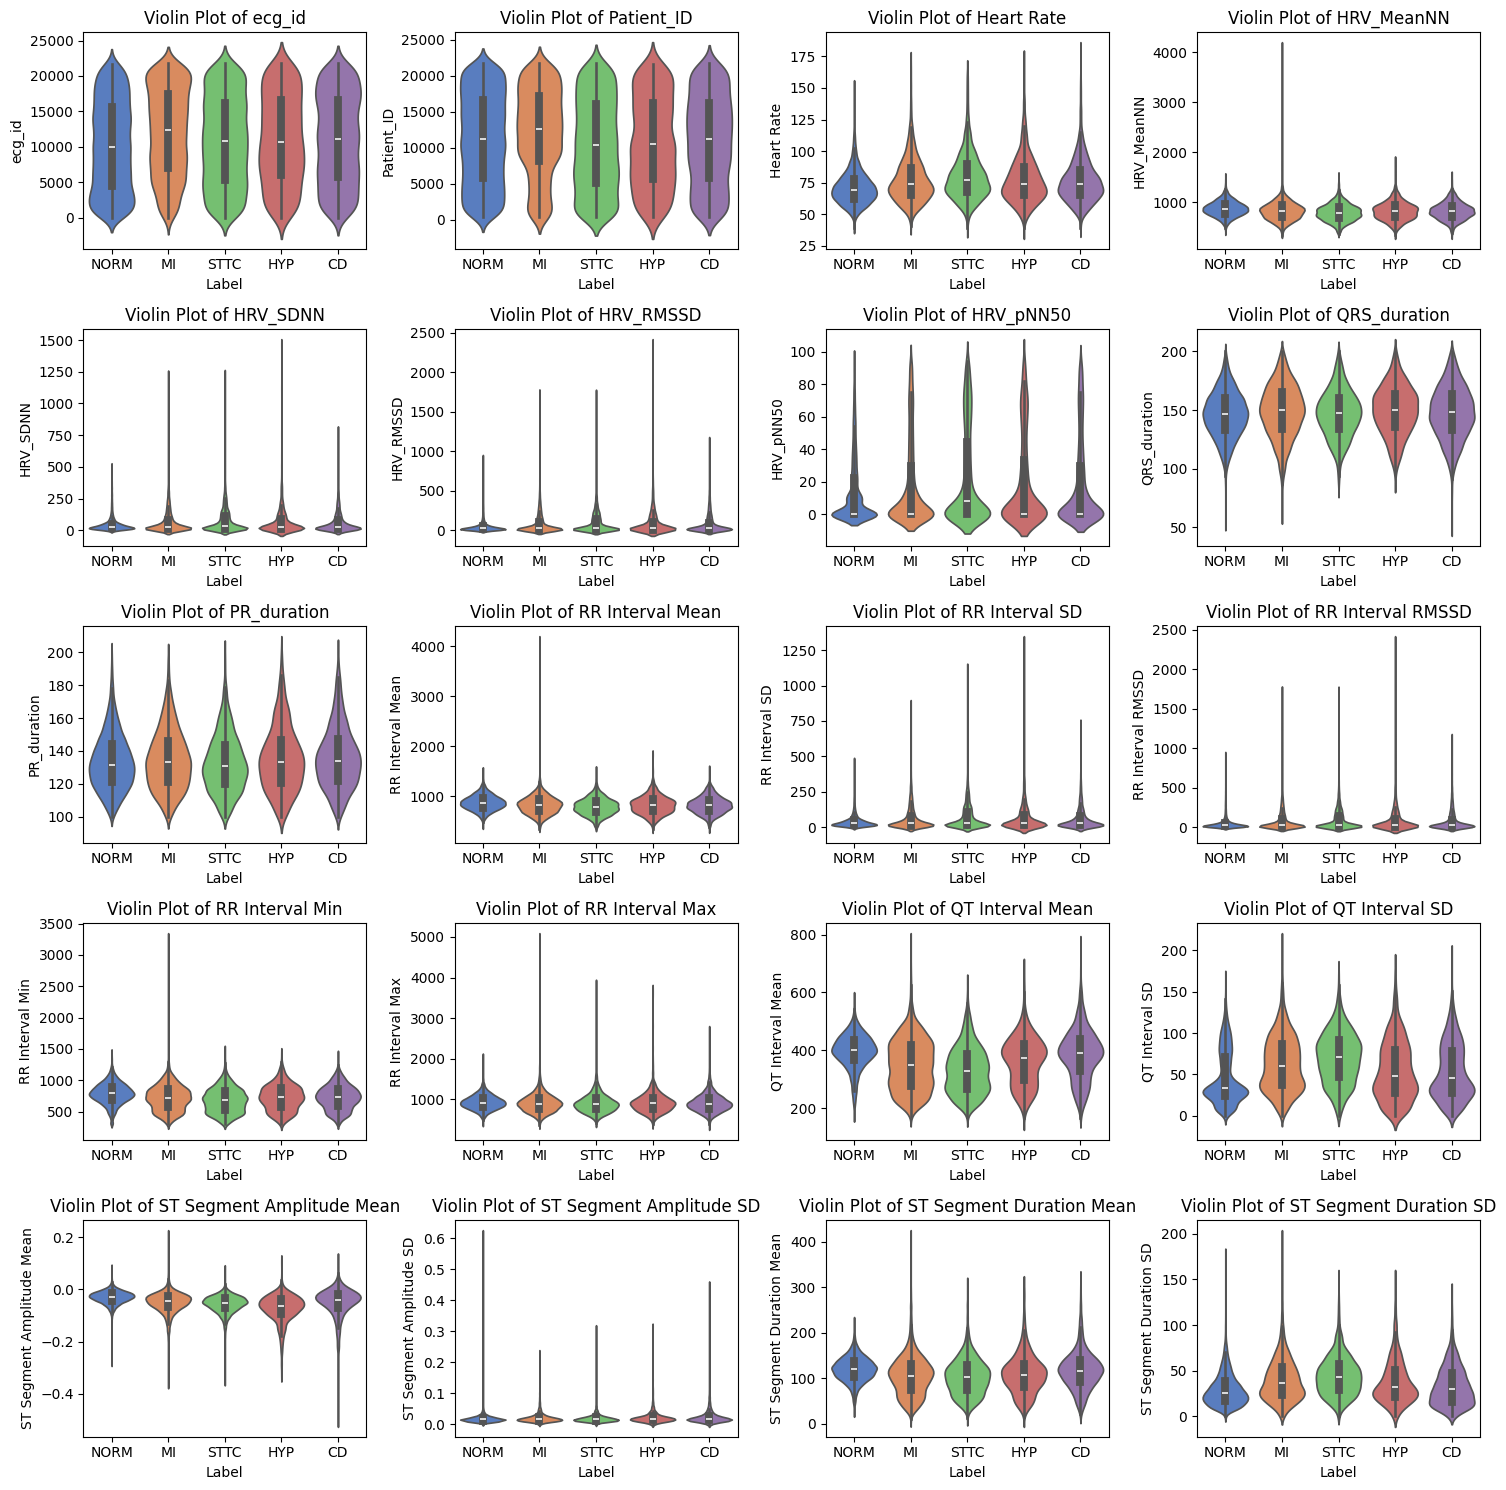

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select numeric columns automatically
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate the number of subplots needed
num_plots = len(numeric_cols)

# Determine the number of rows and columns for subplots
ncols = 4  # Define the number of columns in the grid
nrows = np.ceil(num_plots / ncols).astype(int)  # Calculate the number of rows

# Create a figure with subplots
plt.figure(figsize=(15, nrows * 3))  # Adjust the height of the figure based on the number of rows

# Loop through the numeric columns and create a violin plot for each
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(nrows, ncols, i)  # Dynamically calculate position in the grid
    sns.violinplot(x='Label', y=col, data=df, palette='muted')
    plt.title(f'Violin Plot of {col}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
